# Preliminary look at DHW data

In [70]:
import iris
import iris.quickplot as qplt
import glob
import numpy as np
import matplotlib.pyplot as plt
import os.path
import itertools


In [82]:
def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)


def area_max(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.MAX)

In [79]:
files = glob.glob('data/dhw_Oday_*_hist_ssp???_GBR_ann_max_masked.nc')

In [28]:

models = np.unique([file.split('/')[-1].split('_')[2] for file in files])
experiments = np.unique([file.split('/')[-1].split('_')[4] for file in files])

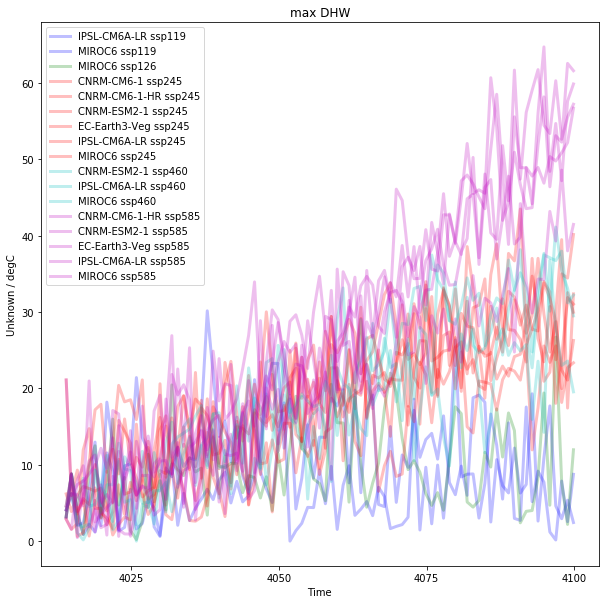

In [84]:
colours = itertools.cycle(('b', 'g', 'r','c','m','k')) 


fig = plt.figure(figsize=(10, 10))

for experiment in experiments:
    colour = next(colours)
    for model in models:
        file = 'data/dhw_Oday_'+model+'_hist_'+experiment+'_GBR_ann_max_masked.nc'
        if os.path.exists(file):
            cube = iris.load_cube(file)
            try:
#                 print avg_cube
                cube.data.mask[np.logical_not(np.isfinite(cube.data.data))] = True
                cube.data.data[np.logical_not(np.isfinite(cube.data.data))] = cube.data.fill_value
                max_cube = area_max(cube)
                qplt.plot(max_cube,alpha=0.25,lw=3,color=colour,label=model+' '+experiment)
            except:
                pass

plt.legend()

plt.title('max DHW')

plt.show()